# REPORT 10
## CLAUDIA CABREL
### 20183351

### PARTE 1- TEXTO

    ¿Cuáles han sido los factores que han influido en los niños innovadores para que durante su vida decidan o no elegir la invención como una carrera profesional? Los autores buscan responder a la pregunta recién presentada mediante el uso de variables y comparaciones estadísticas. La importancia de este texto, según los autores, es evaluar este asunto como un factor determinante para la economía de Estados Unidos. Por tal motivo, realizan un detallado análisis de la vida de algunos de los grandes inventores de Estados Unidos con el fin de evaluar su niñez y crianza y si estas son variables adecuadas para el estudio.
    
    Por una parte, se encontraron dos fortalezas. Primero, los autores comprenden la importancia de convertir este estudio a uno no solamente estadístico y plenamente cuantitativo, sino que agregar un factor extra el cual es el social. Es de esta forma que se logra observar un valor agregado debido a la importancia que se le da, por ejemplo, a variables como la brecha de oportunidades según el género, o también la variable de ingresos económicos teniendo en cuenta que la realidad de algunos de los niños será totalmente distinta a la de otros según los ingresos percibidos por sus padres, esto afectando severamente los resultados que se pueden obtener acerca de si el niño se convertirá en un inventor de gran importancia en Estados Unidos o no. Segundo, informan acerca de cómo el rendimiento de los niños en ciertos cursos de la primaria pueden ser un gran indicador del futuro que puede tener el niño como innovador o no. Por otra parte, se observó una debilidad, que creo yo es la más crucial; sin embargo, no afecta en gran medida el desarrollo del estudio, y es que no se hizo análisis acerca de los años luego de la niñez, si bien es comprensible que luego de cierta edad el cerebro humano ha llegado a la mayoría de su desarrollo, es importante comprender que la innovación implica más que la parte química, sino también, como lo son las variables, otros indicadores sociales que pueden hacer que durante los próximos años la población estudiada cambie de parecer al querer elegir la carrera de la innovación.
    
    El aporte brindado por los autores a la pregunta de investigación es que ofrecen la solución a la brecha de innovación. Los autores mencionan que sería una buena idea implementar una serie de políticas que impulsarían eficientemente un alza de los porcentajes de inventores en el país. Esto podría llevarse a cabo, según ellos, mediante programas que se podrían ofrecer a los estudiantes para tener una mayor exposición a la innovación.
    
    Un siguiente paso que podría llevar esta investigación a una con mayores resultados podría ser agregar al análisis una comparación de este estudio aplicado en otros países, para observar si efectivamente se trata de que las variables propuestas son efectivamente influenciables, o si en todo caso se trata de la idiosincrasia y cultura de la investigación e innovación de un solo país."

### PARTE 2 - CODIGO
#### Claudia Cabrel y Aisha Martinez

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')

In [2]:
pip install causalgraphicalmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
from causalgraphicalmodels import CausalGraphicalModel

In [4]:
pip install label

Note: you may need to restart the kernel to use updated packages.


In [5]:
from cProfile import label

In [6]:
%matplotlib inline

REGRESIÓN CONTINUA

* Explique de manera muy breve y resumida en qué consiste una regresión discontinua.

    La regresión discontinua es un diseño cauasi experimental que ayuda a realizar inferencia causal en ausencia de aleatorización. Ayuda a comprarar el resultado justo por encima y por debajo del umbral para identificar el efecto del tratamiento en el umbral. Esto es considerado un diseño de sharp RD o RD nítido, ya que la probabilidad de obtener el tratamiento salta de 0 a 1 en el umbral.

* Detalle un ejemplo en la vida real en donde podría emplear una regresión discontinua.

    Un ejemplo que puede verse en la vida real es el coeficiente Gini que mide la desigualdad salarial en países a nivel mundial y se necesita un análisis para recolectar dato y ver la situación de cada país.

* Explique el diseño Sharp Desing y comente un ejemplo en la vida real en donde podría aplicarlo (sea lo más detallado posible).

    El diseño Sharp Design suele emplearse en casos en los que se asigna el tratamiento en casos de que se de un punto de corte discreto donde los elegibles eligen el tratamiento y los que no son elegibles no.


### APLICACIONES - EJEMPLO 1

In [7]:
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat = dat[dat.x<100]
dat['D'] = 0

dat.loc[dat.x>50, 'D'] = 1

dat['y'] = 15 + 22*dat.D + 2.5 * dat.x + np.random.normal(0, 20, dat.shape[0])

dat_0 = dat[dat.D == 0]

dat_1 = dat[dat.D == 1]

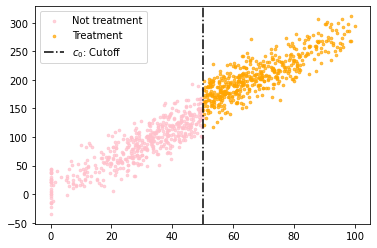

In [8]:
treat_c = "orange" 
n_treat = "pink" 

plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")
plt.legend();

In [9]:
def y_hat_lin(da_ta, x = "x", y = "y"):
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

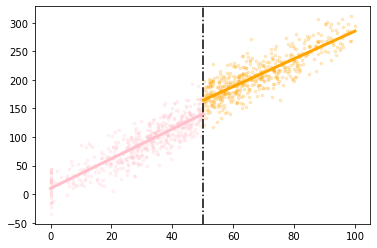

In [10]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);

In [11]:
eff = min(data_y1.yhat) - max(data_y0.yhat)
eff = round(eff,  2)
print("Effect:", f"{eff}")

Effect: 24.39


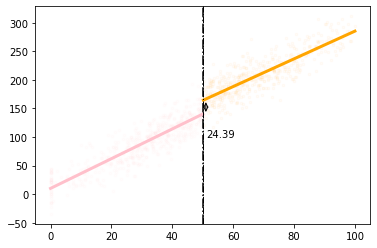

In [12]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{eff}", xy = (51, eff + 76))
plt.annotate("", xy = (51, max(data_y0.yhat)), xytext = (51, min(data_y1.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));

### APLICACIONES EJEMPLO 2

In [13]:
dat2 = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat2.loc[dat2.x<0, 'x'] = 0
dat2 = dat2[dat2.x<100]
dat2['D'] = 0

dat2.loc[dat2.x>50, 'D'] = 1

dat2['y'] = 12 + 60*dat2.D + 1.3 * dat2.x + np.random.normal(0, 20, dat2.shape[0])

dat2_0 = dat2[dat2.D == 0]

dat2_1 = dat2[dat2.D == 1]

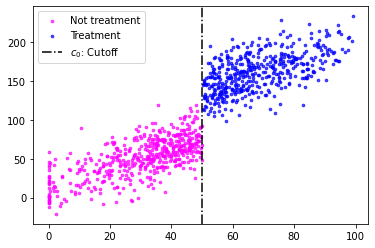

In [14]:
treat_c = "blue" 
n_treat = "magenta" 

plt.scatter("x", "y", data = dat2_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat2_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")
plt.legend();

In [15]:
def y_hat_lin(da_ta, x = "x", y = "y"):
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y02 = y_hat_lin(dat2_0)
data_y12 = y_hat_lin(dat2_1)

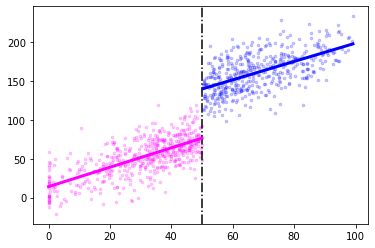

In [16]:
plt.scatter("x", "y", data = dat2_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat2_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y02, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y12, color = treat_c, lw = 3);

In [17]:
eff2 = min(data_y12.yhat) - max(data_y02.yhat)
eff2 = round(eff2,  2)
print("Effect:", f"{eff2}")

Effect: 63.85


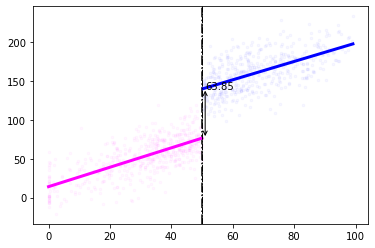

In [18]:
plt.scatter("x", "y", data = dat2_0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat2_1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y02, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y12, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{eff2}", xy = (51, eff2 + 76))
plt.annotate("", xy = (51, max(data_y02.yhat)), xytext = (51, min(data_y12.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));